# Import Libraries

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Read Data

In [84]:
# Converting the .csv into a DataFrame with pandas 
df = pd.read_csv('/workspaces/EDA_5_alfonso/data/raw/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Execution of a .info() for a oversight of the dataset. This is value information regarding the shape of the data, datatypes and valid values by columns.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Univariant Analisis

We introduce our automatic code which displays one histogram per varaibale using seaborn and matplotlib. 

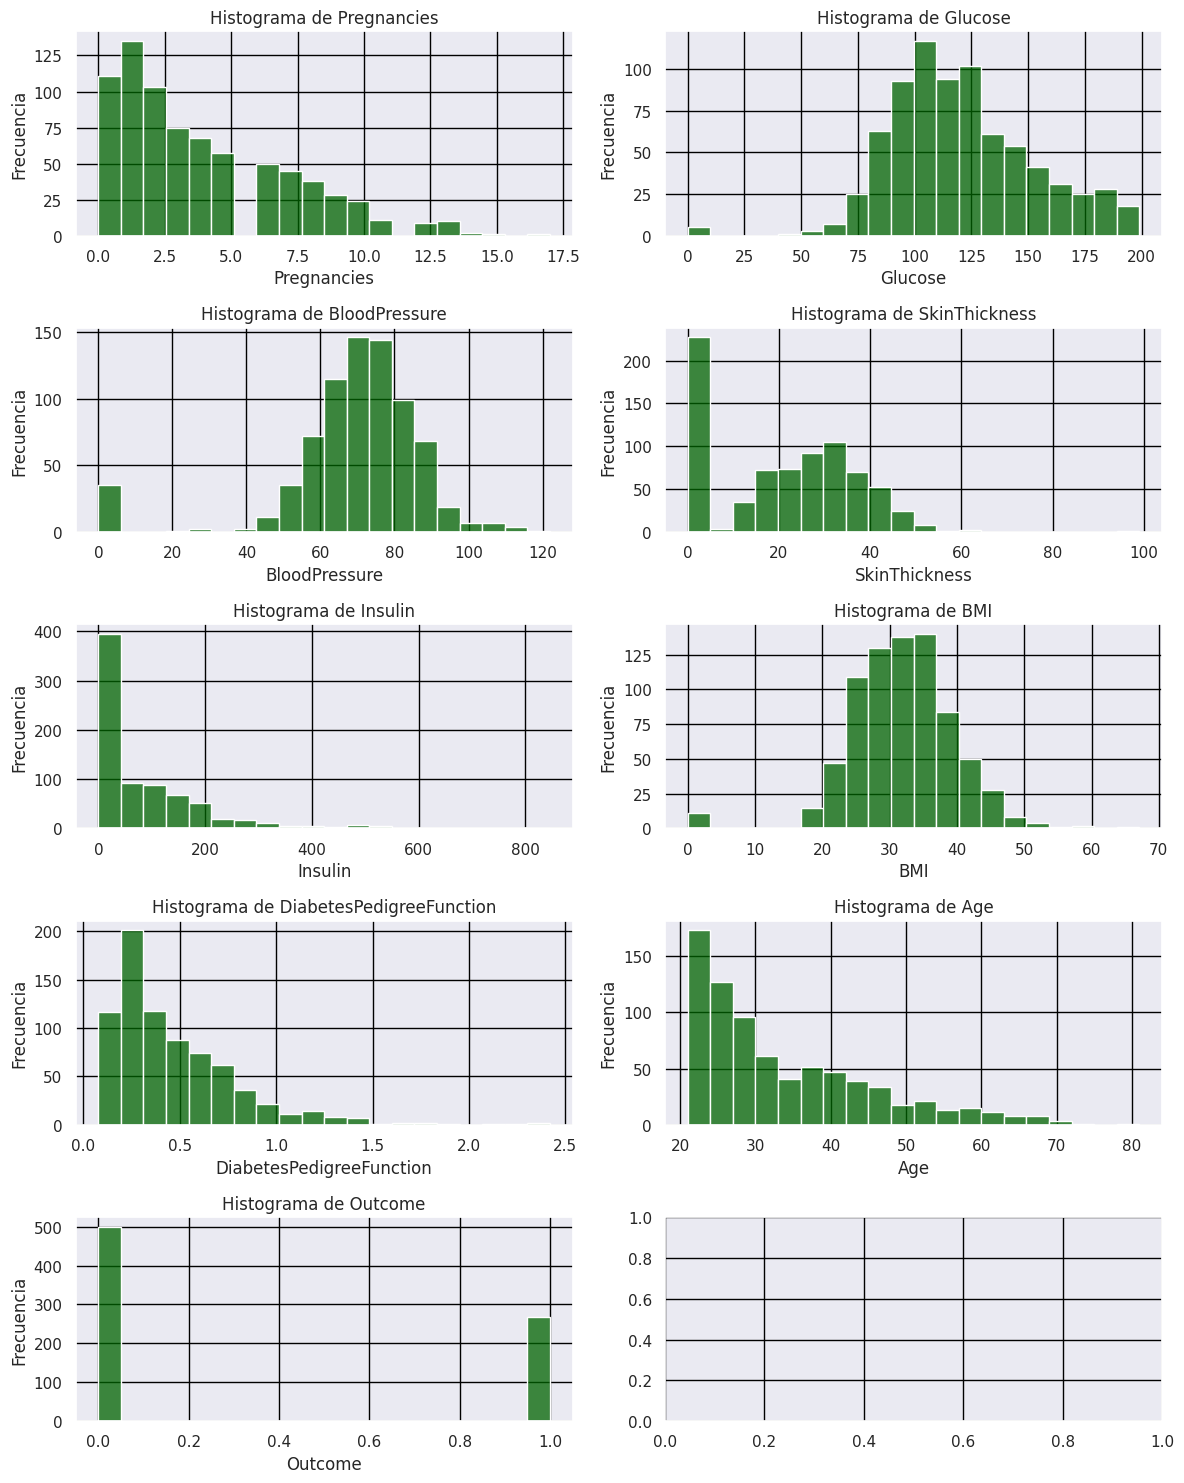

In [86]:
sns.set(rc={'axes.facecolor': '#eaeaf2', 'grid.color': 'black'})

# Obtener el número de columnas en el DataFrame
num_columns = len(df.columns)

# Establecer el número de subgráficos por fila
num_subplots_per_row = 2

# Calcular el número total de filas necesarias
num_rows = (num_columns + num_subplots_per_row - 1) // num_subplots_per_row

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, 3 * num_rows))

# Aplanar la matriz de subgráficos para facilitar la iteración
axes = axes.flatten()

# Iterar por cada columna y crear un histograma
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, color='darkgreen', ax=ax)  # Puedes ajustar los parámetros según tus preferencias
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

Observations:
- En los embarazos podemos observar una distribución asimétrica derecha de sus datos, mostrando una caída de valores a medida que aumentan su número
- La glucosa nos muestra de la misma forma una distribución asimétrica derecha, pero menos pronunciada que la de los embarazos
- En cuanto a la pesión sanguínea, se tratsa de una distribución normal haciendo hincapié en unos cuantos valores de 0 que posteriormente analizaremos
- Los datos del grosor de la piel nos permiten observar lo mismo que la presión sanguínea: unos pocos ceros y una distribución normal
- Los valores de la Insulina nos muestran una distribución asimétrica derecha con un exagerado pico en el 0, el cual tendremos que explorar
- BMI muestra algo parecido a una distribución normal y unos cuantos ceros imposibles
- Con el Pedigree vemos una asimétrica derecha de no ser por un gran pico entre el 0 y el 0.5
- La edad est una clara distribución asimétrica derecha. Los usuarios del conjunto de datos son en su mayoría gente joven
- Por último observamos nuestro target, que nos muestra visualmente, aproximadamente, el doble de pacientes sin diabetes que con la enfermedad

# Multivariant Analisis

Using an automated code will provide us a regplot for each variable related to our target. <>

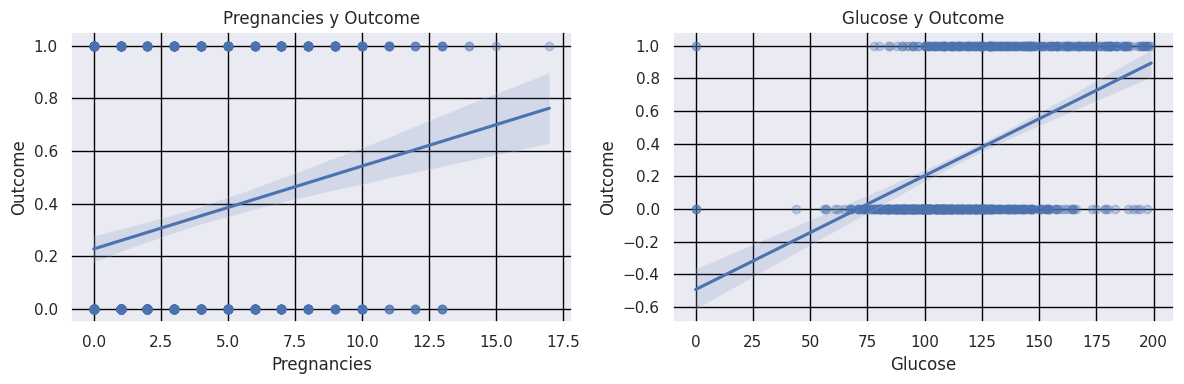

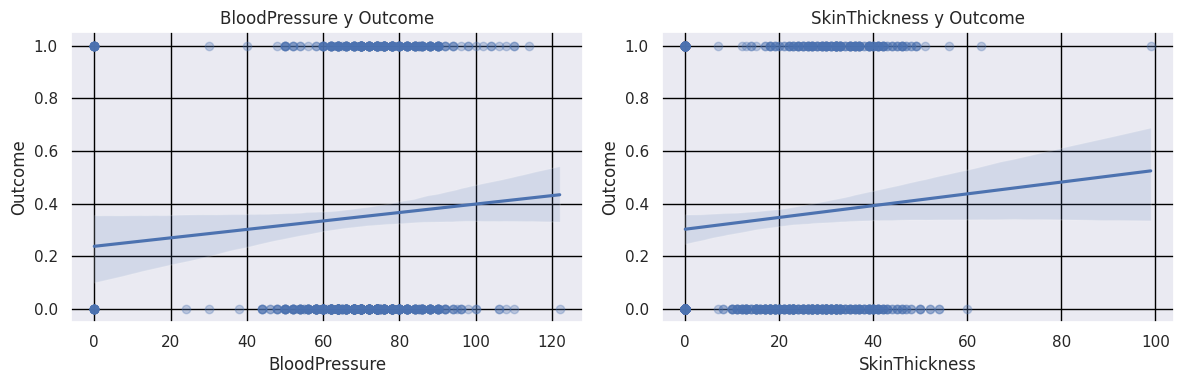

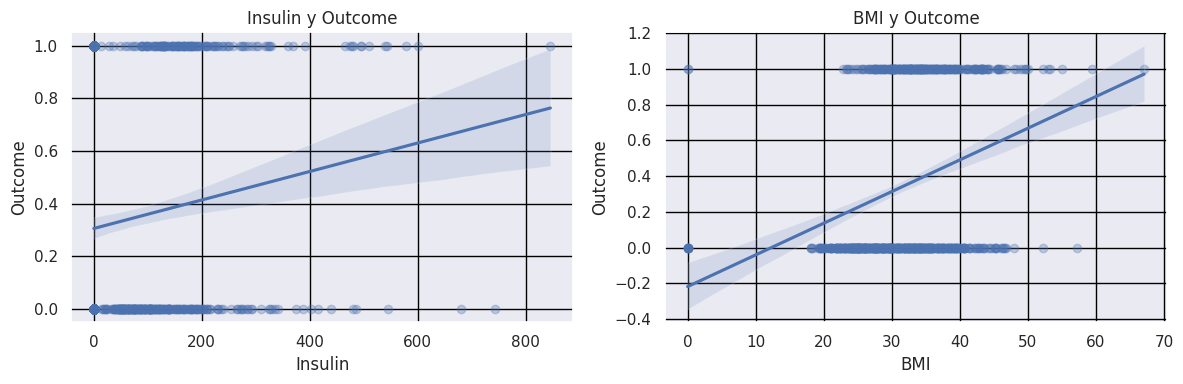

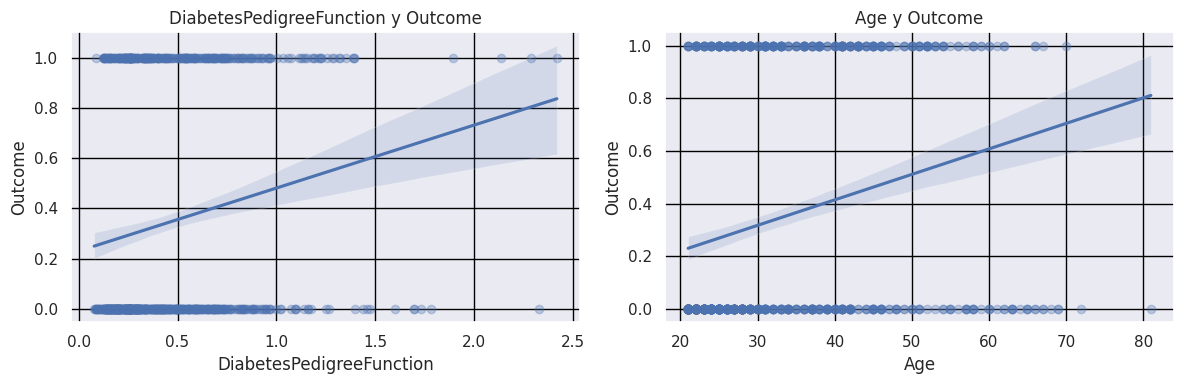

In [87]:
target_column = 'Outcome'

feature_columns = [col for col in df.columns if col != target_column]

# Dividir las columnas en pares
column_pairs = [(feature_columns[i], feature_columns[i+1]) if i+1 < len(feature_columns) else (feature_columns[i], None) for i in range(0, len(feature_columns), 2)]

# Iterar a través de los pares de columnas y trazar regplots
for pair in column_pairs:
    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Iterar sobre las dos columnas del par
    for i, feature_column in enumerate(pair):
        if feature_column is not None:
            # Crear un gráfico de dispersión con línea de regresión
            sns.regplot(x=feature_column, y=target_column, data=df, scatter_kws={'alpha':0.3}, ax=axes[i])
            
            # Configuración del título y etiquetas
            axes[i].set_title(f'{feature_column} y {target_column}')
            axes[i].set_xlabel(feature_column)
        else:
            # Si la columna es None, eliminar el segundo eje
            fig.delaxes(axes[i])
    
    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

Thanks to the lines that are provided by regplots, we can quickly establish relations between the predictors and de predicted variable. Somne are more pronunced than others, but absolutly all of them have a relation.

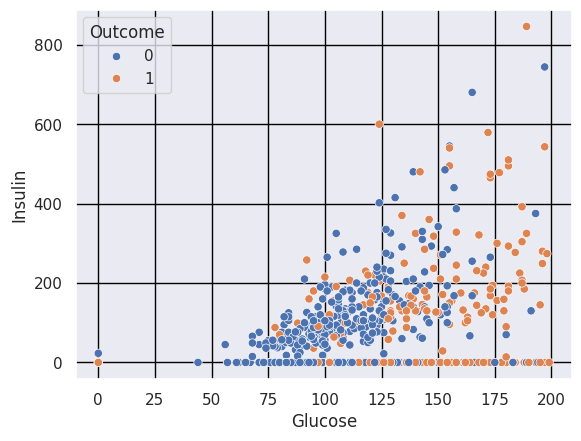

In [88]:
sns.scatterplot(data = df, x = "Glucose", y = "Insulin", hue = "Outcome")
plt.show()

The higher both levels, Glucose and Insulin, are, the higher is the count of people with diabetes.

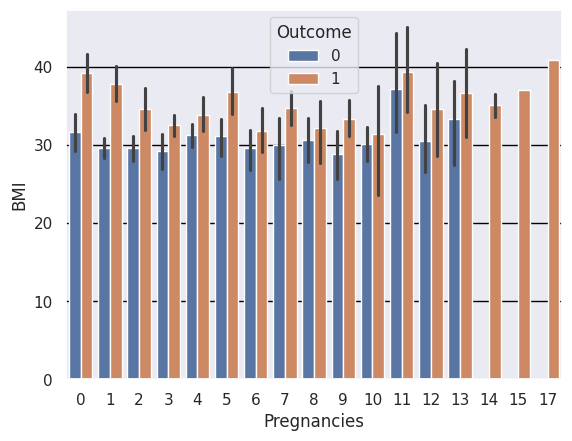

In [89]:
sns.barplot(data = df, x = "Pregnancies", y = "BMI", hue = "Outcome")
plt.show()

A high BMI level is more relevant than the number of pregnancies in order to get diabetes, although if you have more than 13 pregnancies, it seems you will get diabetes uninevitably.

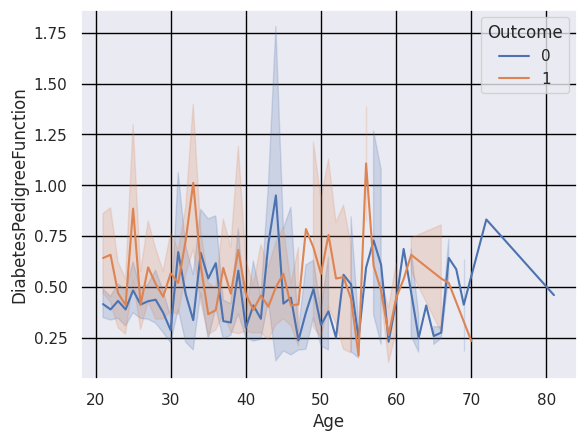

In [90]:
sns.lineplot(data = df, x = "Age", y = "DiabetesPedigreeFunction", hue = "Outcome")
plt.show()

From 20 to 35 years and 47 to 57 years, it appears that you have more probability to get diabetes if your ancestrors had it. Curious is that in the range between 40 and 46 years, according to our data, you may not get diabetes if yout ancestrors had it. Ages above 65 years show a similar response.

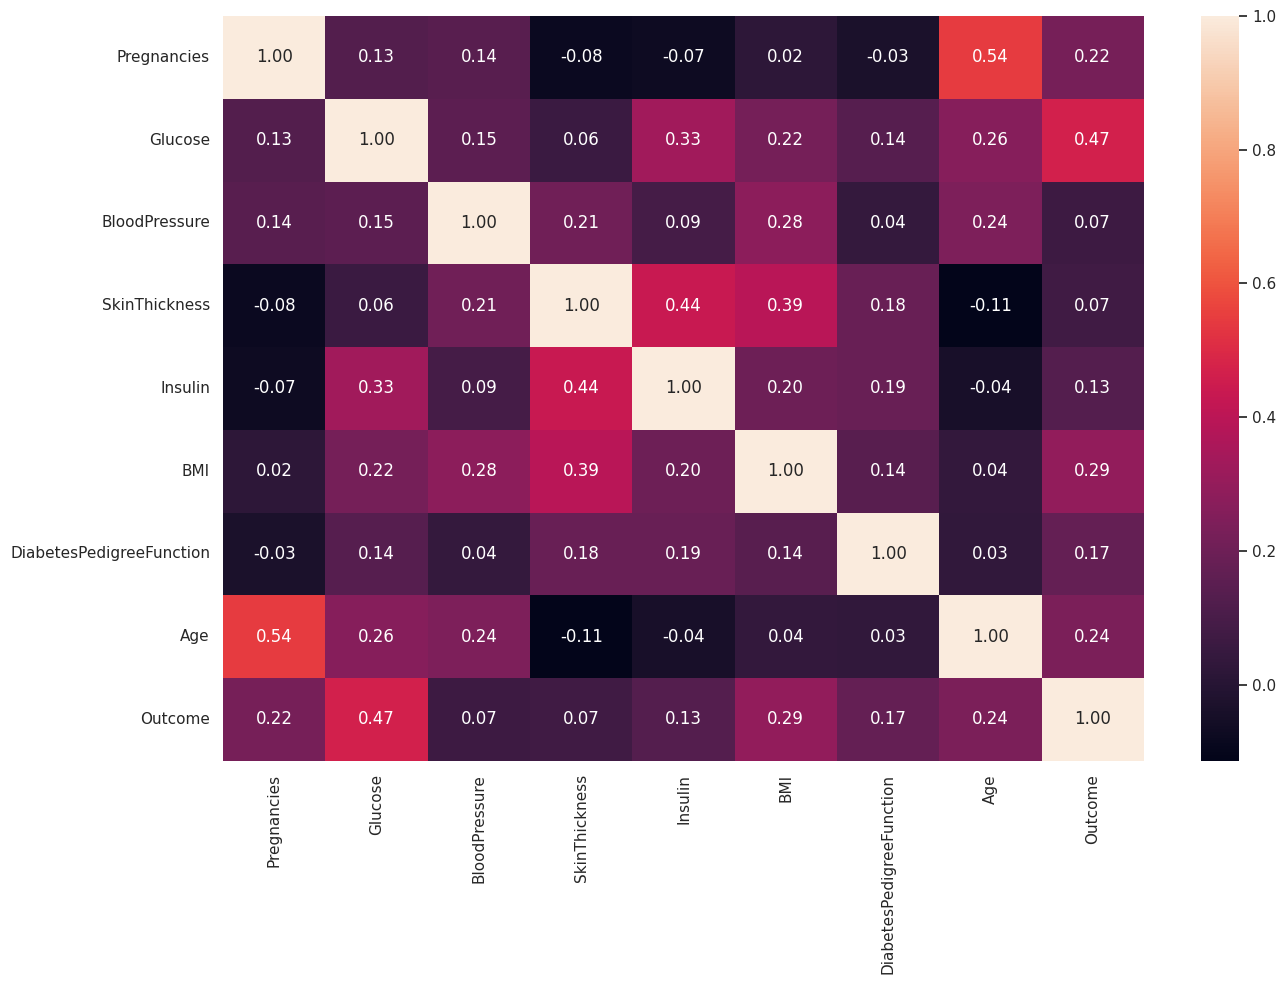

In [91]:
fig, axis = plt.subplots(figsize = (14, 10))
lista_de_columnas = df.columns.tolist()
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

The output for the correlation matrix displays that the strongest realtion with the Outcome is given by the levels of Glucose (0.47), followed by the BMI (0.29) and the age (0.24).

# Feature Engineering

## Outliers

Next, we execute .describe() and sort the values in a descending order by std to see which ones are the variables with the biggest deviation. We'll take the 4 biggest and plot them into boxplots to visualize the possible outliers.

In [92]:
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42


<Axes: ylabel='SkinThickness'>

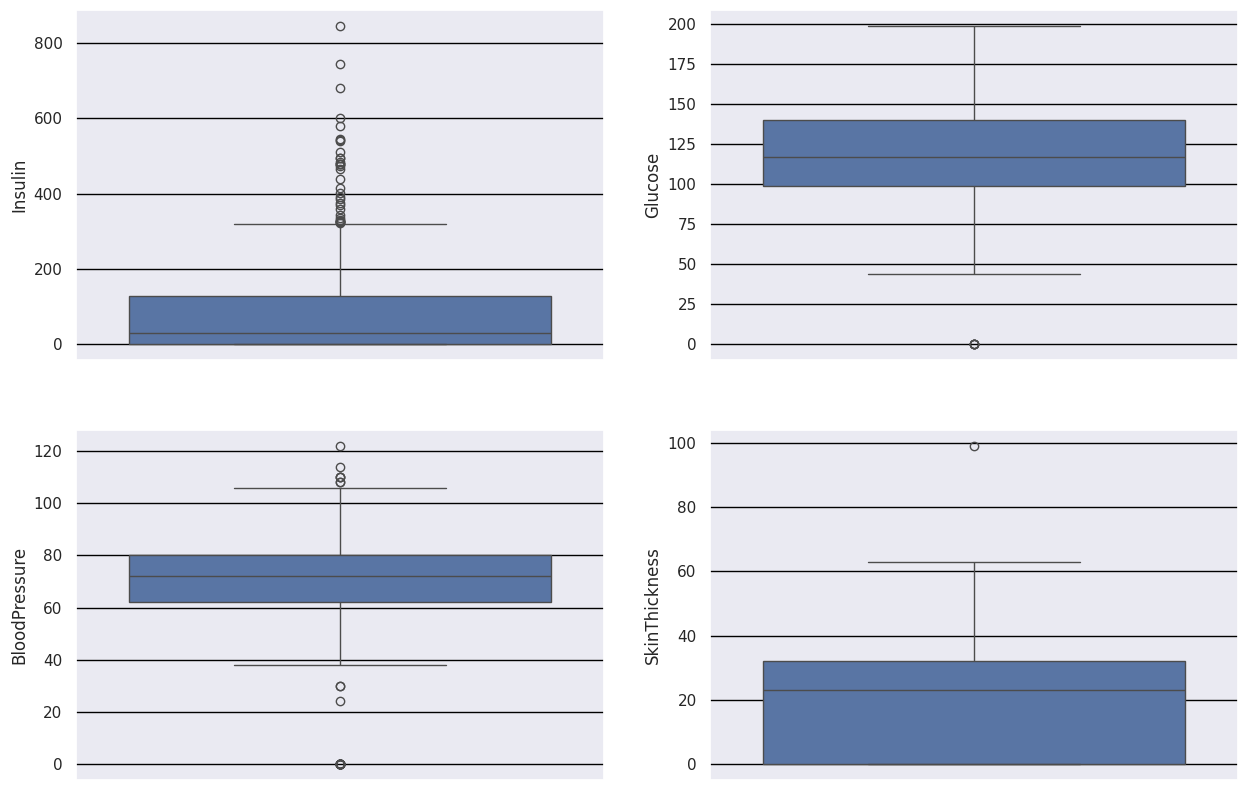

In [93]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = df, y = "Insulin")
sns.boxplot(ax = axis[0, 1], data = df, y = "Glucose")
sns.boxplot(ax = axis[1, 0], data = df, y = "BloodPressure")
sns.boxplot(ax = axis[1, 1], data = df, y = "SkinThickness")

There are too many values that exceed the upper 75% of insulin so we decide to equalize them to that point. We read that percentage in the above describe code and set it into a variable. In the case of the Blood Pressure there are not that much outliers so we decide to keep them.

In [94]:
# Set upper limit variable
upper_biggot = 127.25

# Set all values above that value to the variable
df.loc[df["Insulin"] > upper_biggot, "Insulin"] = upper_biggot


/tmp/ipykernel_658/1564251312.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '127.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Insulin"] > upper_biggot, "Insulin"] = upper_biggot


In [95]:
# Print the Insulin column to check the result
df["Insulin"].head(30)

0       0.00
1       0.00
2       0.00
3      94.00
4     127.25
5       0.00
6      88.00
7       0.00
8     127.25
9       0.00
10      0.00
11      0.00
12      0.00
13    127.25
14    127.25
15      0.00
16    127.25
17      0.00
18     83.00
19     96.00
20    127.25
21      0.00
22      0.00
23      0.00
24    127.25
25    115.00
26      0.00
27    127.25
28    110.00
29      0.00
Name: Insulin, dtype: float64

<Axes: ylabel='Insulin'>

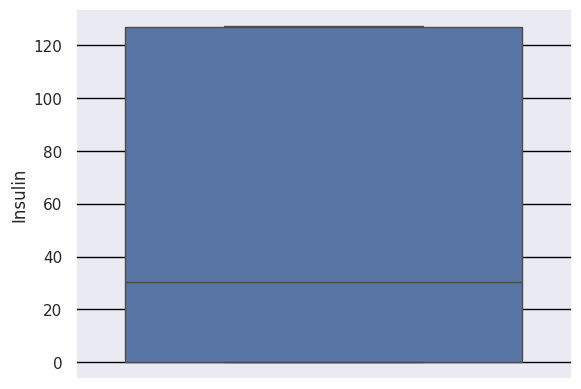

In [96]:
# Remake the boxplot
sns.boxplot(data = df, y = "Insulin")

At this point the location of the biggest outliers are printed just to watch it's location.

In [97]:
columns_to = [
    "Insulin",
    "Glucose",
    "BloodPressure", 
    "SkinThickness"
]

outliers_idx = []

for column in columns_to:
    outliers_idx.append(df[column].idxmax())

for idx in outliers_idx:
    print("")
    print(df.iloc[idx])


Pregnancies                   0.000
Glucose                     137.000
BloodPressure                40.000
SkinThickness                35.000
Insulin                     127.250
BMI                          43.100
DiabetesPedigreeFunction      2.288
Age                          33.000
Outcome                       1.000
Name: 4, dtype: float64

Pregnancies                   1.000
Glucose                     199.000
BloodPressure                76.000
SkinThickness                43.000
Insulin                       0.000
BMI                          42.900
DiabetesPedigreeFunction      1.394
Age                          22.000
Outcome                       1.000
Name: 661, dtype: float64

Pregnancies                   1.000
Glucose                      96.000
BloodPressure               122.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          22.400
DiabetesPedigreeFunction      0.207
Age                          27.000
Outcome    

## Nulls

At the beggining of this EDA we saw that there we're no nulls according to the .info() function. Nevertheless we've been observing lots of them, but probably been set as objects or integers and therefore not been read as nulls or NA. For that matter we will in the coming step convert all of them ceros into NA's.

Levels of Glucose and Blood Pressure beneath 40 points are not reliable so we will set this values to NAs, too.

In [98]:
# Set variable 
columnas1 = ['Glucose', 'BloodPressure']
# Apply map function to convert all its values under 40 to NA
df[columnas1] = df[columnas1].map(lambda x: x if x >= 40 else pd.NA)

# Set second variable
columnas2 = ['BMI', 'SkinThickness', 'Insulin']
# replace all them values 0 for NA
for col in columnas2:
    df[col] = df[col].replace(0, pd.NA)

# Sum both variables into one
columnas_cero = columnas1 + columnas2

Now the .info() function throws a new non-null information, which is more accurate

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    object 
 2   BloodPressure             729 non-null    object 
 3   SkinThickness             541 non-null    object 
 4   Insulin                   394 non-null    object 
 5   BMI                       757 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


In [100]:
df["BMI"].sort_values(ascending = True)

418    18.2
438    18.2
526    18.2
239    18.4
90     19.1
       ... 
426    <NA>
494    <NA>
522    <NA>
684    <NA>
706    <NA>
Name: BMI, Length: 768, dtype: object

In [101]:
df["SkinThickness"].sort_values(ascending = True)

254       7
519       7
434       8
382       8
279      10
       ... 
757    <NA>
758    <NA>
759    <NA>
762    <NA>
766    <NA>
Name: SkinThickness, Length: 768, dtype: object

In [102]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                39
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

At this point we take the previously created variable "columnas_cero", where all our columns with NA values are stored, and apply the fillna() function to replace all that missing values for the median values of their own columns.

In [103]:
df[columnas_cero] = df[columnas_cero].fillna(df[columnas_cero].median())

In [104]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [105]:
df["BMI"].sort_values(ascending = True)

438    18.2
418    18.2
526    18.2
239    18.4
90     19.1
       ... 
120    53.2
125    55.0
673    57.3
445    59.4
177    67.1
Name: BMI, Length: 768, dtype: float64

# Feature Selection

## Train/ Test split


In [106]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24, stratify = y)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
712,10,129.0,62.0,36.0,125.00,41.2,0.441,38
626,0,125.0,68.0,29.0,125.00,24.7,0.206,21
157,1,109.0,56.0,21.0,127.25,25.2,0.833,23
401,6,137.0,61.0,29.0,125.00,24.2,0.151,55
355,9,165.0,88.0,29.0,125.00,30.4,0.302,49


In [107]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
163,2,100.0,64.0,23.0,125.0,29.7,0.368,21
759,6,190.0,92.0,29.0,125.0,35.5,0.278,66
379,0,93.0,100.0,39.0,72.0,43.4,1.021,35
556,1,97.0,70.0,40.0,125.0,38.1,0.218,30
504,3,96.0,78.0,39.0,125.0,37.3,0.238,40


In [108]:
y_train.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_train.csv", index = False)
y_test.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_test.csv", index=False)
X_train.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_train.csv", index=False)
X_test.to_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_test.csv", index=False)